# Transfer Learning with MobileNetV2 for MNIST Classification

Reference: https://www.geeksforgeeks.org/ml-introduction-to-transfer-learning/

## Step 1: Preparing the Dataset

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape to 3 channels and normalize
train_images = np.stack([train_images]*3, axis=-1) / 255.0
test_images = np.stack([test_images]*3, axis=-1) / 255.0

# Resize images to 32x32
train_images = tf.image.resize(train_images, [32, 32])
test_images = tf.image.resize(test_images, [32, 32])

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

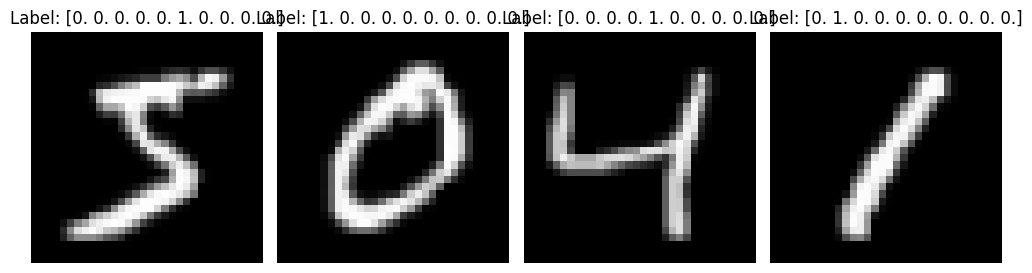

In [5]:
import matplotlib.pyplot as plt

# Print 4 images in a row
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 2: Building the Model

In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model

inputs = Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

/var/folders/bg/lmk1vp_s5qqgqvw65qf1zq_sdyfk87/T/ipykernel_62942/3104373990.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Step 3: Compiling and Training the Model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.4415 - loss: 1.8412 - val_accuracy: 0.6043 - val_loss: 1.3005
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.6099 - loss: 1.2633 - val_accuracy: 0.6382 - val_loss: 1.1409
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6319 - loss: 1.1399 - val_accuracy: 0.6527 - val_loss: 1.0730
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.6514 - loss: 1.0743 - val_accuracy: 0.6593 - val_loss: 1.0380
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.6536 - loss: 1.0465 - val_accuracy: 0.6653 - val_loss: 1.0155
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6630 - loss: 1.0179 - val_accuracy: 0.6687 - val_loss: 1.0004
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6589 - loss: 1.0090 - val_accuracy: 0.6697 - val_loss: 0.9905
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6657 -

## Step 4: Fine-Tuning the Model

In [8]:
# Unfreeze some layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

# Compile with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.2277 - loss: 10.9154 - val_accuracy: 0.1622 - val_loss: 10.8865
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.4729 - loss: 2.7507 - val_accuracy: 0.2523 - val_loss: 2.4177
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.5925 - loss: 1.6213 - val_accuracy: 0.6545 - val_loss: 1.1367
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.6838 - loss: 1.1670 - val_accuracy: 0.7901 - val_loss: 0.7400
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.7484 - loss: 0.8972 - val_accuracy: 0.8460 - val_loss: 0.5593


## Step 5: Model Evaluation

In [9]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8298 - loss: 0.6045
Test loss: 0.5858839154243469
Test accuracy: 0.8413000106811523


## Step 6: Visualizing Model Performance

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


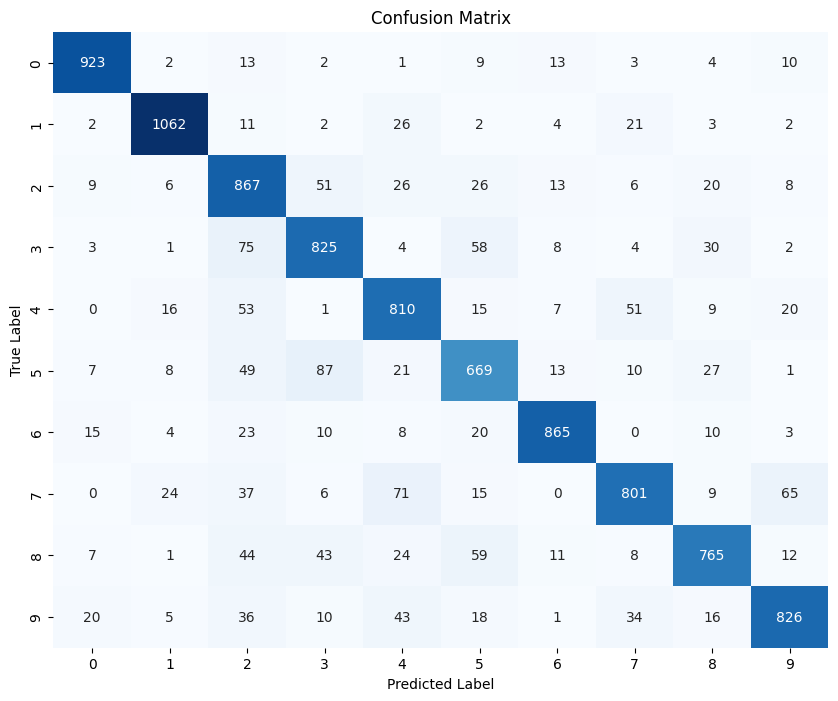

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

# Plot confusion matrix
cm = confusion_matrix(test_true_classes, test_predictions_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Step 7: Sample Image Visualization

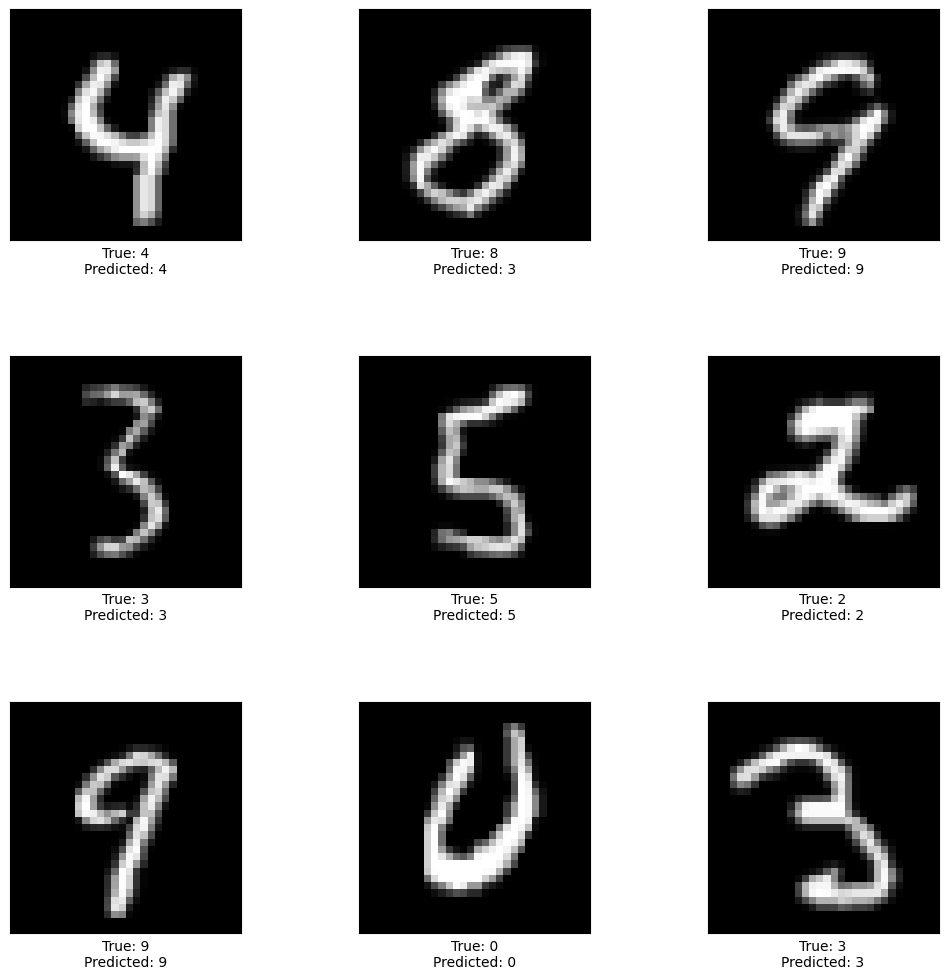

In [13]:
def display_sample(sample_images, sample_labels, sample_predictions):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(sample_images[i].reshape(32, 32), cmap='gray')
        ax.set_xlabel(f"True: {sample_labels[i]}\nPredicted: {sample_predictions[i]}")
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

# Convert RGB to grayscale for visualization
test_images_gray = np.dot(test_images[...,:3], [0.2989, 0.5870, 0.1140])

# Select and display a sample
random_indices = np.random.choice(len(test_images_gray), 9, replace=False)
sample_images = test_images_gray[random_indices]
sample_labels = test_true_classes[random_indices]
sample_predictions = test_predictions_classes[random_indices]
display_sample(sample_images, sample_labels, sample_predictions)